### Activity 3 (Wednesday)
As a reminder the objective of this study is to predict the `total claim amount` of a customer and study/investigate the impact of the factors (input features) on the target variable(`total claim amount`). That means in your exploratory data analysis, you have to look for patterns in this data that shows interesting relationships among the input features as well as with relation to the target feature.
- Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms.
  - Do the distributions for different numerical variables look like a normal distribution? 
- For the numerical variables, check for correlation between the input features. Note: this does not include the target feature.
- Plot the Correlation Heatmap.
- (Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
## Install xlrd package to load Excel files
#!conda install openpyxl
#!conda install xlrd

In [10]:
#let's import the file Data_Marketing_Customer_Analysis_Round3.csv

df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [3]:
#Get the numeric data into dataframe called num_df

num_df = df.select_dtypes(include=[np.number])

In [4]:
#Get the categorical data into a dataframe called cat_df

cat_df = df.select_dtypes(exclude=[np.number])

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

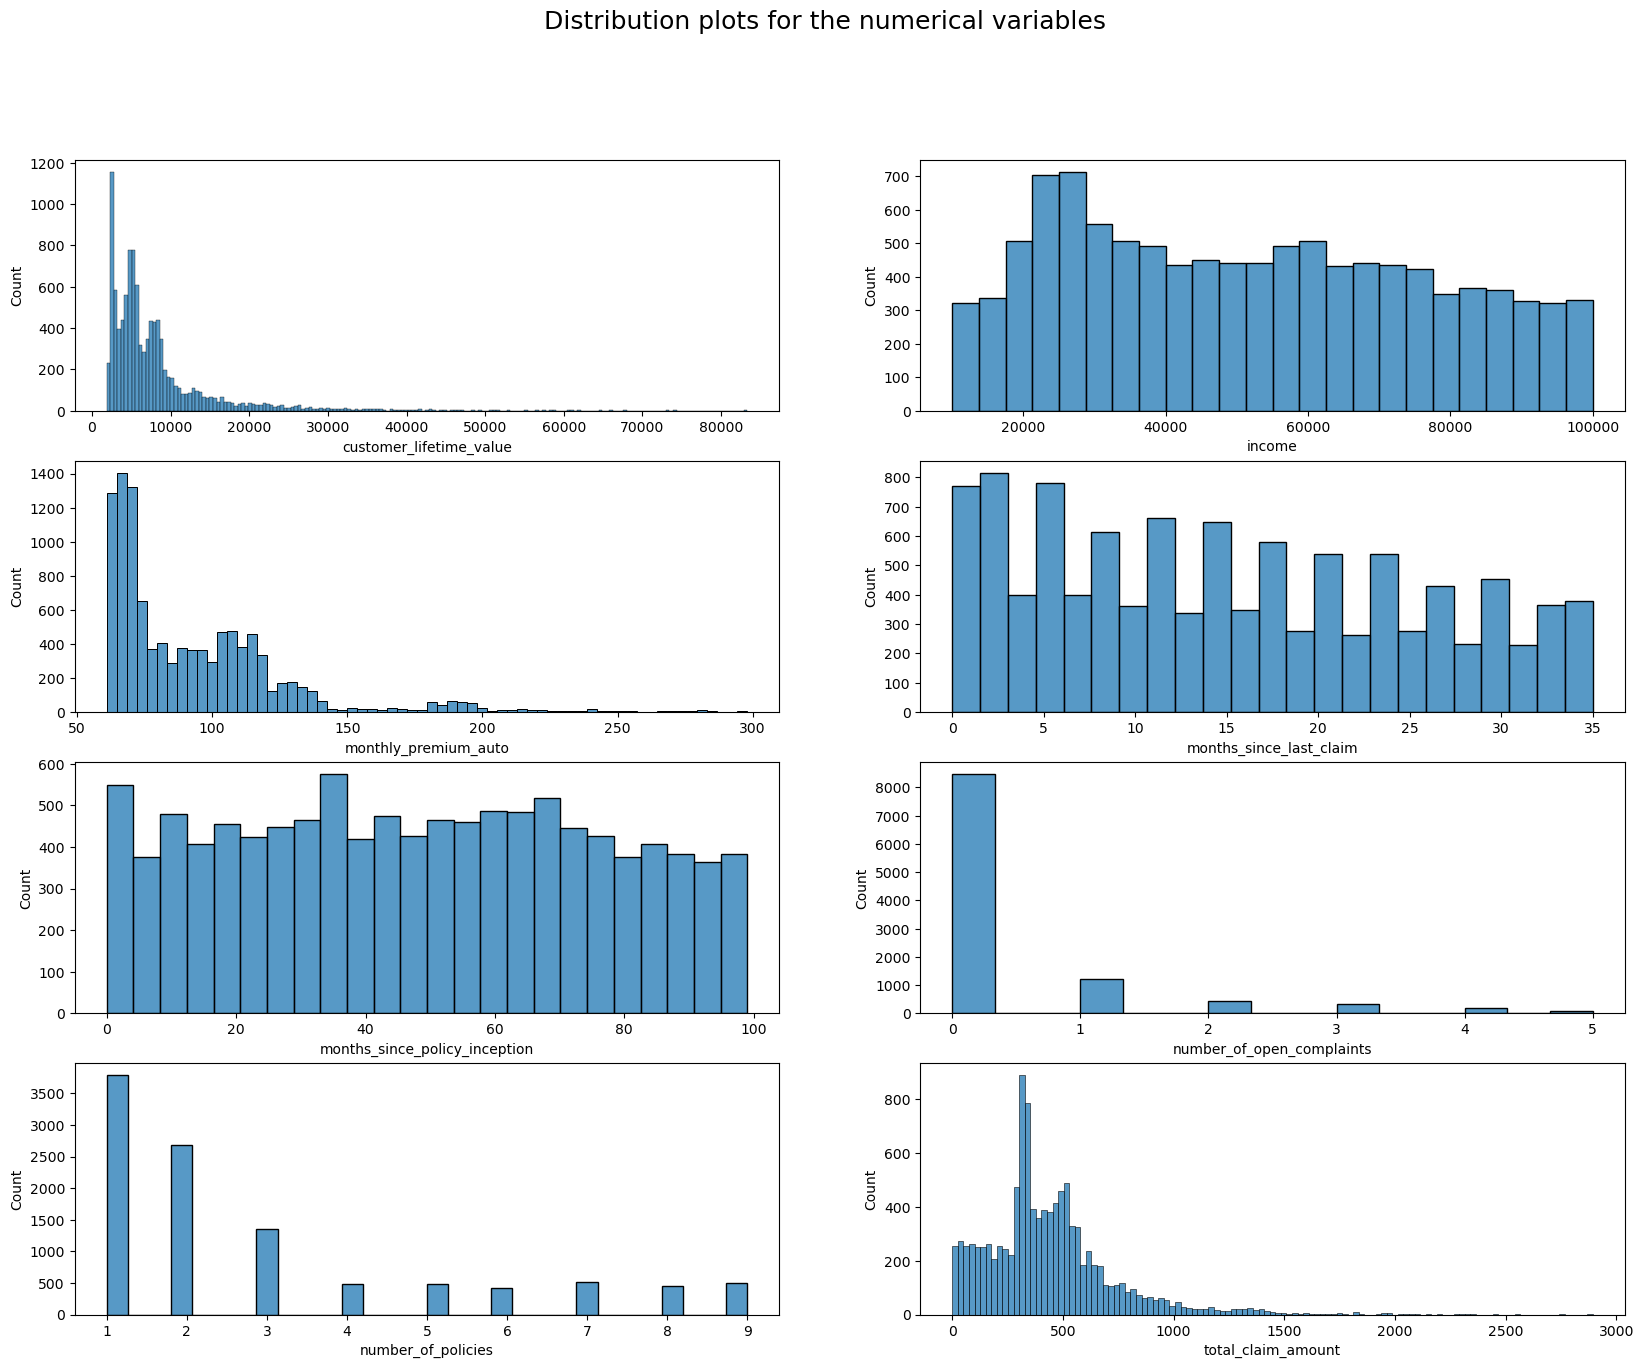

In [5]:
#Use seaborn library to construct distribution plots for the numerical variables

# create the figure and axes
fig, ax = plt.subplots(4, 2, figsize = (20,15)) 

# add an overall title for the figure
fig.suptitle('Distribution plots for the numerical variables', fontsize=18)

# create the plots, adding a title
sns.histplot(data=num_df, x='customer_lifetime_value', ax=ax[0,0])
sns.histplot(data=num_df, x='income', ax=ax[0,1])
sns.histplot(data=num_df, x='monthly_premium_auto', ax=ax[1,0])
sns.histplot(data=num_df, x='months_since_last_claim', ax=ax[1,1])
sns.histplot(data=num_df, x='months_since_policy_inception', ax=ax[2,0])
sns.histplot(data=num_df, x='number_of_open_complaints', ax=ax[2,1])
sns.histplot(data=num_df, x='number_of_policies', ax=ax[3,0])
sns.histplot(data=num_df, x='total_claim_amount', ax=ax[3,1])

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

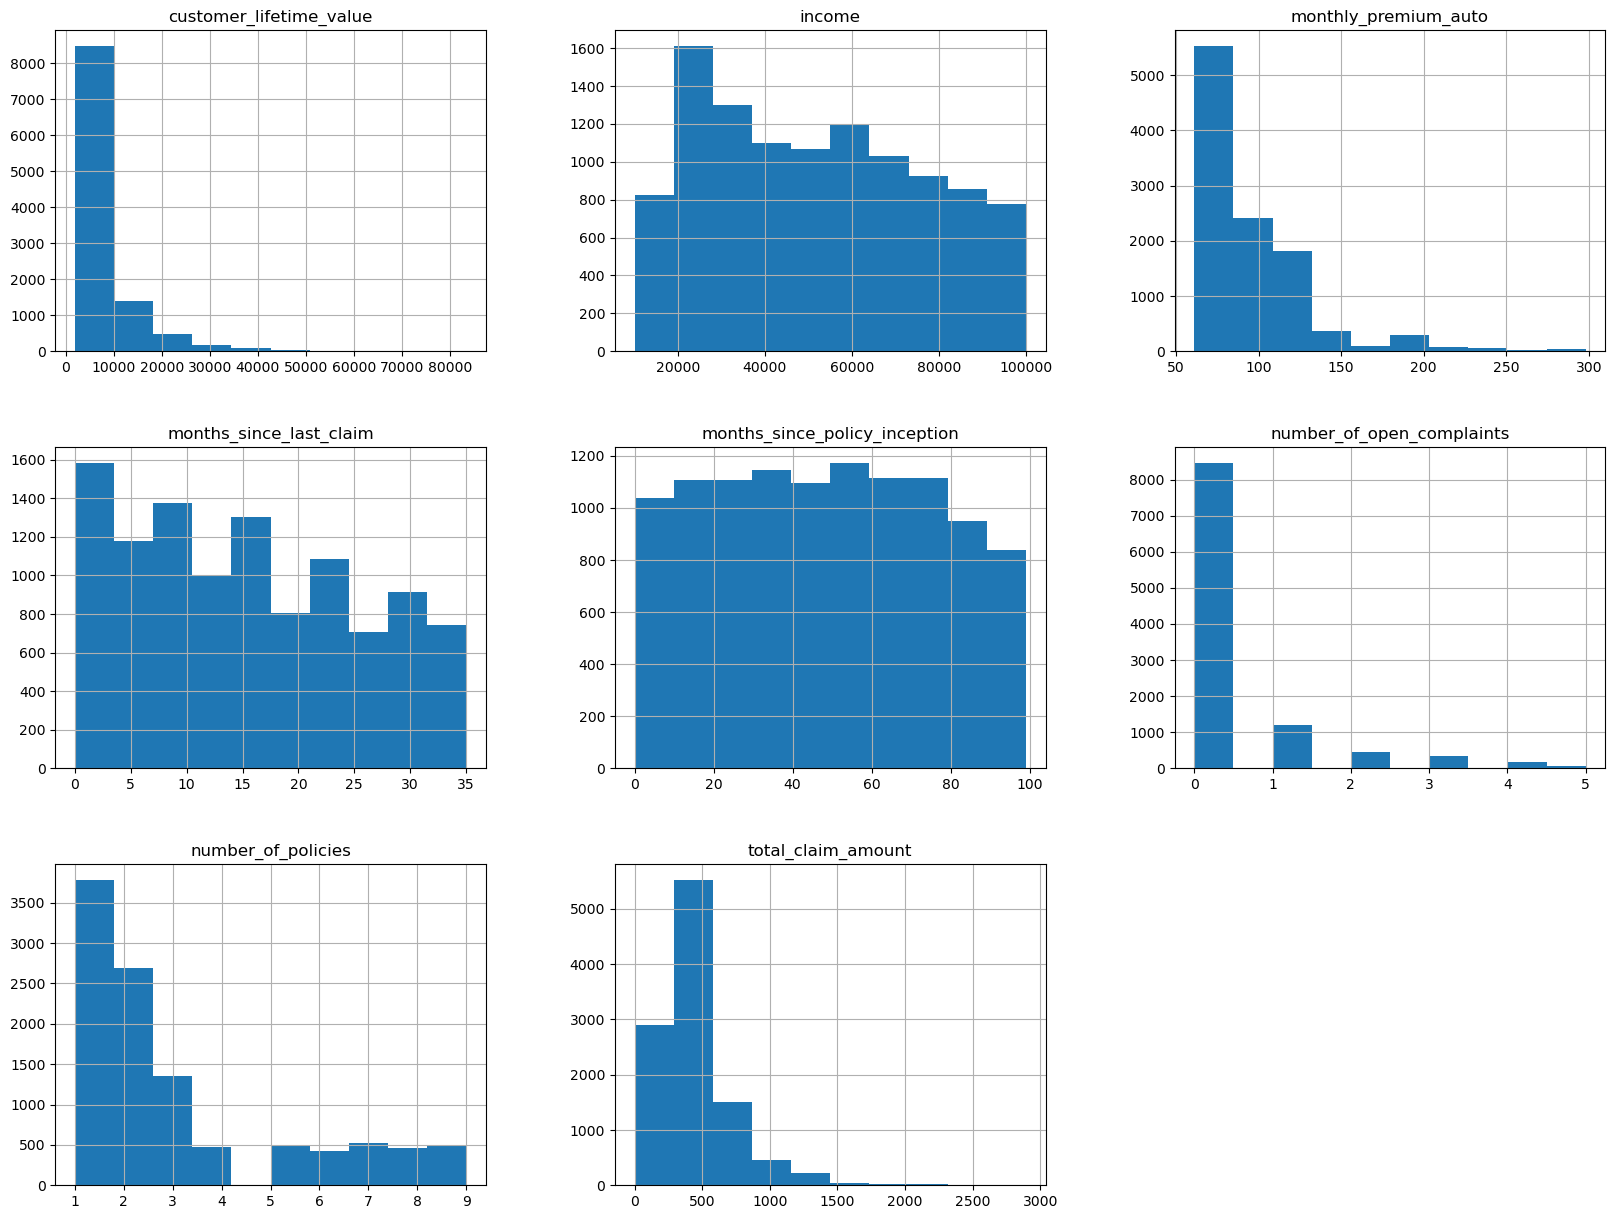

In [6]:
# Use Matplotlib to construct histograms

num_df.hist(figsize = (20,15))

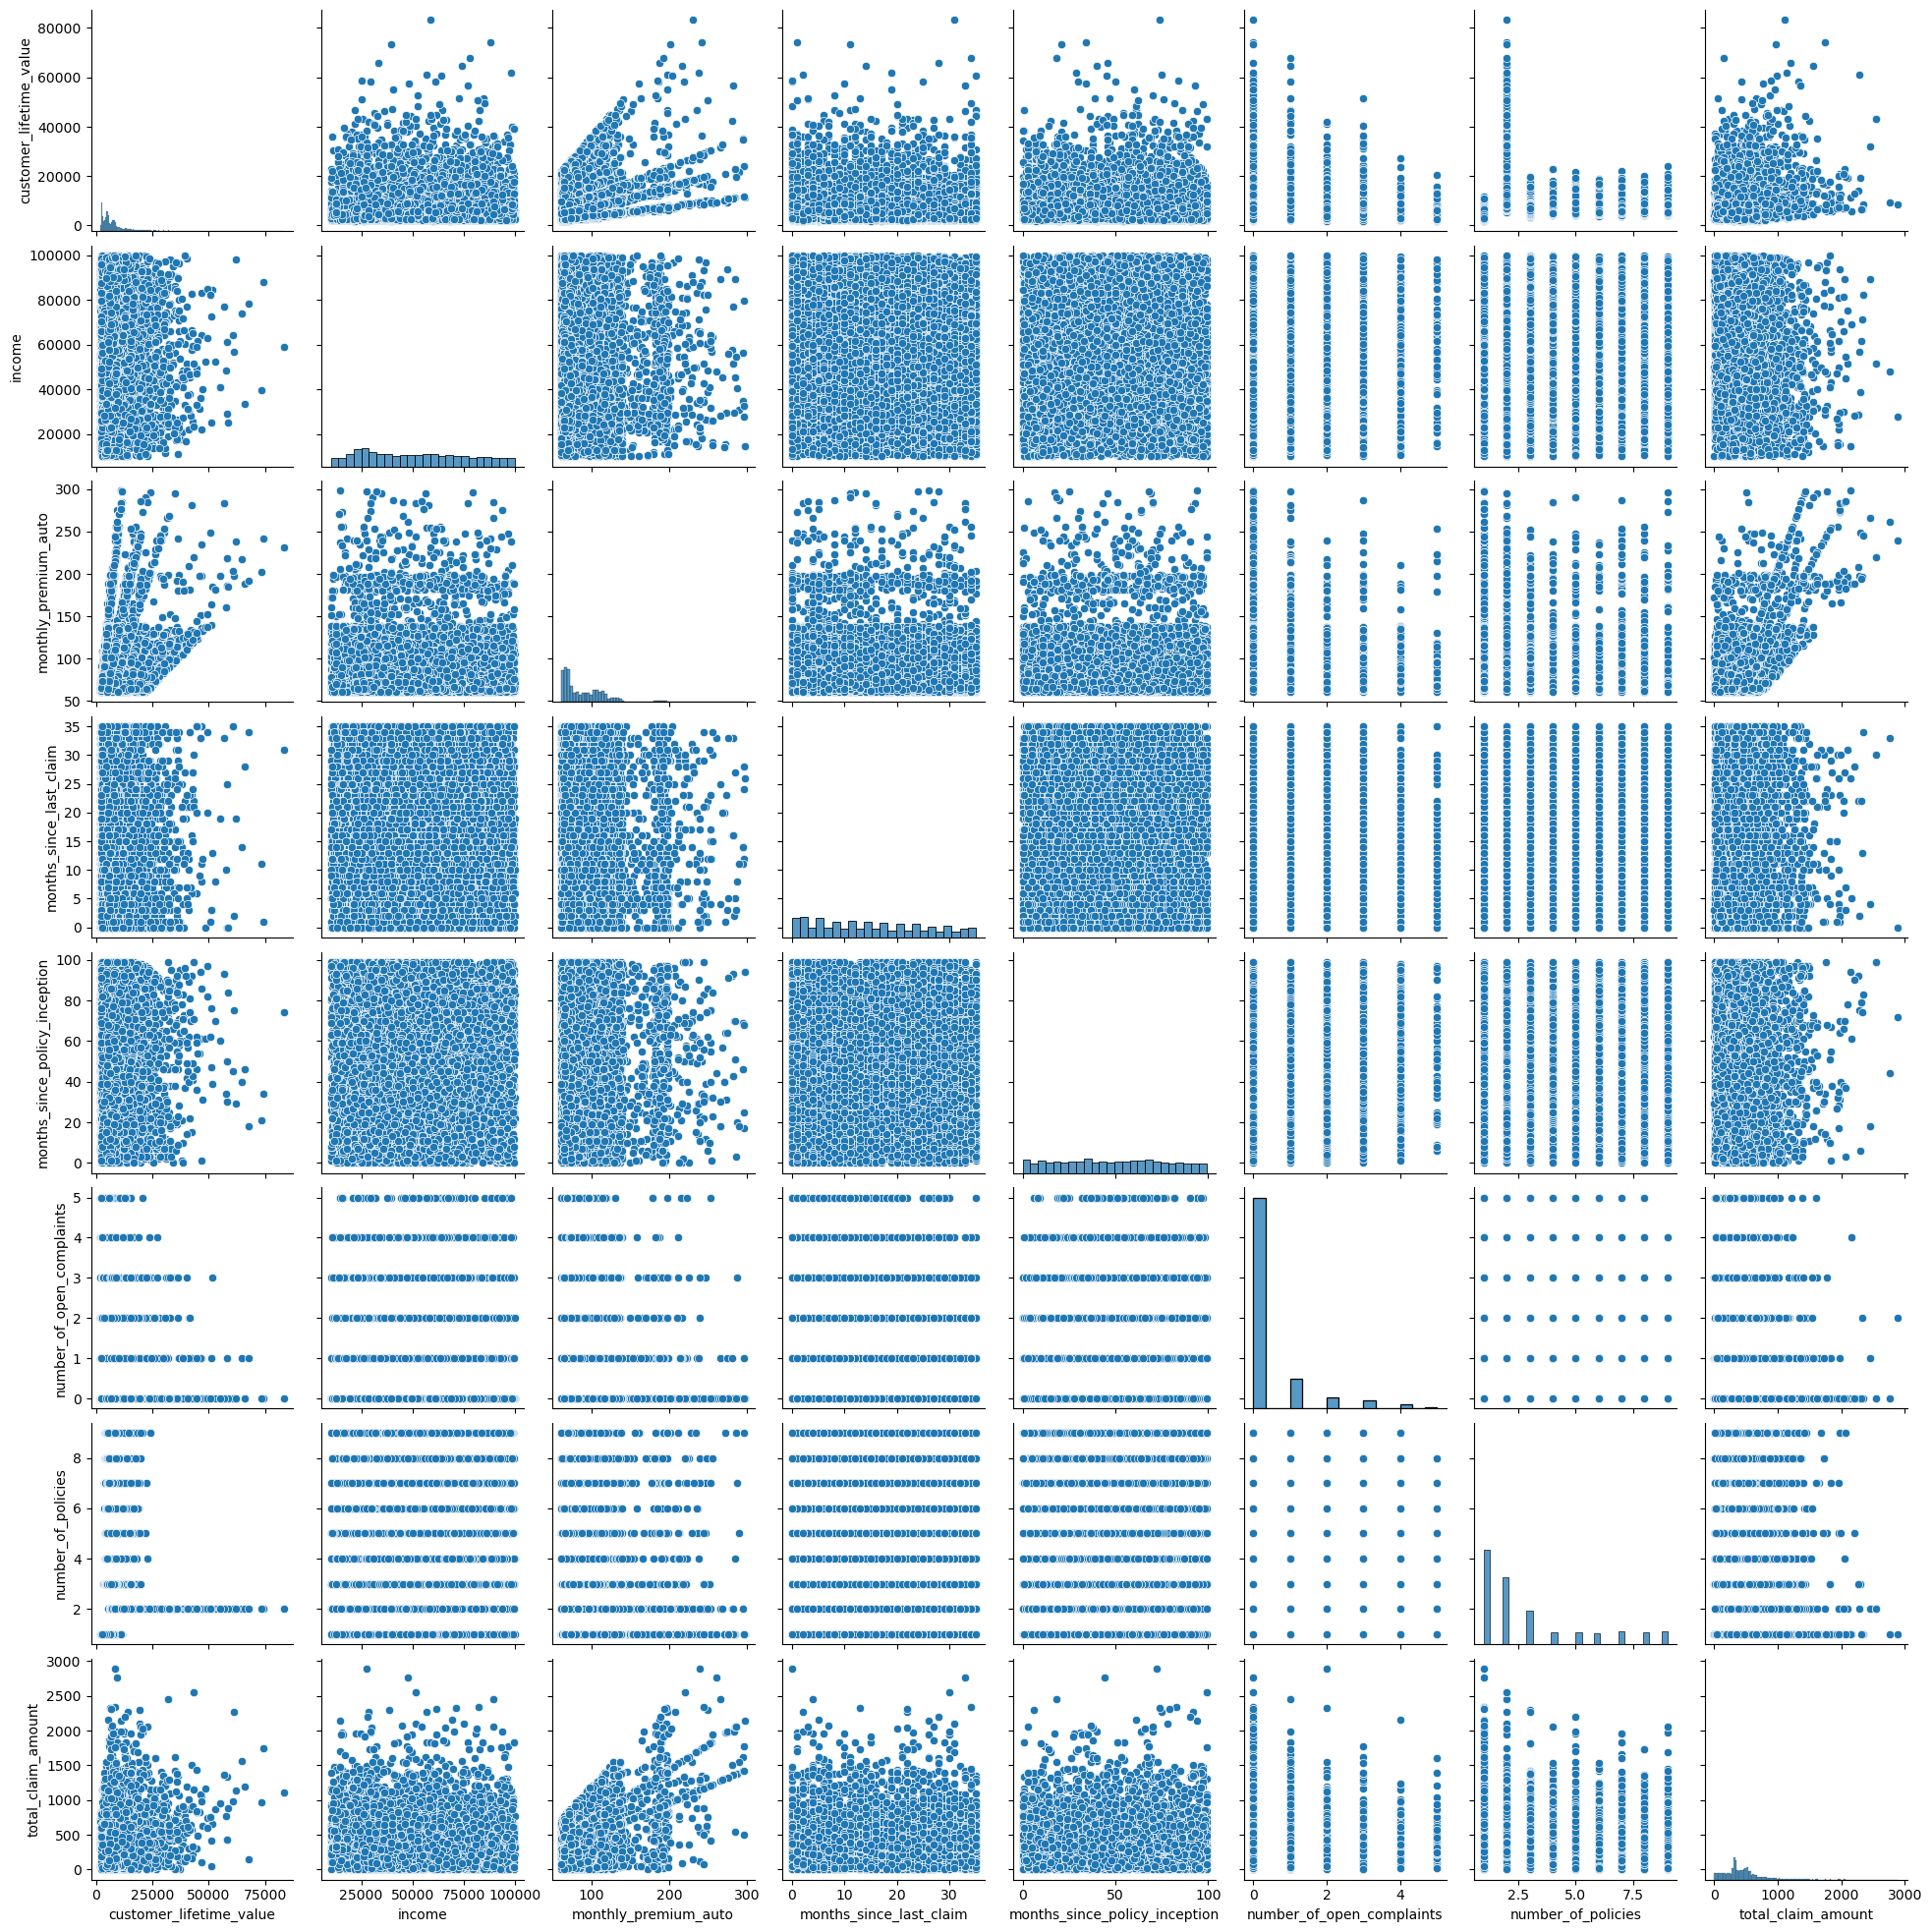

In [7]:
# For the numerical variables, check for correlation between the input features. Note: this does not include the target feature

sns.pairplot(num_df)

<AxesSubplot:>

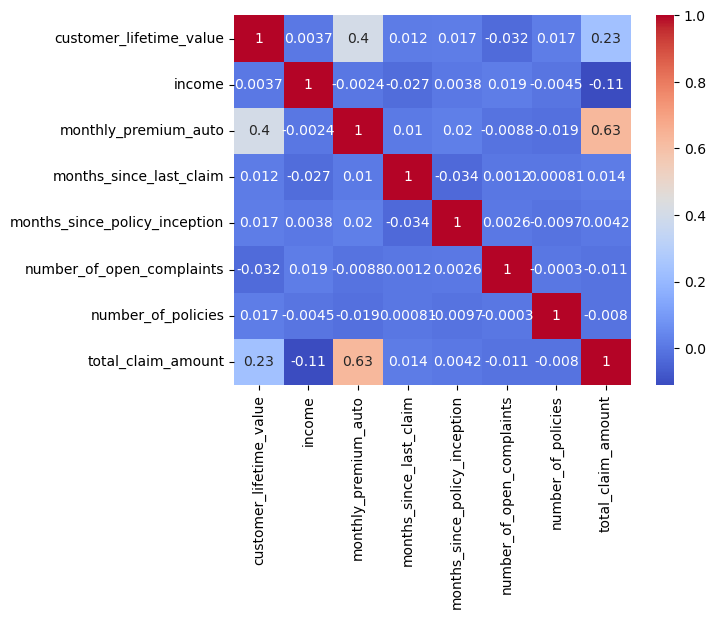

In [8]:
# Plot the Correlation Heatmap

sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:title={'center':'Customer Lifetime Value by Monthly Premium'}, xlabel='monthly_premium_auto', ylabel='customer_lifetime_value'>

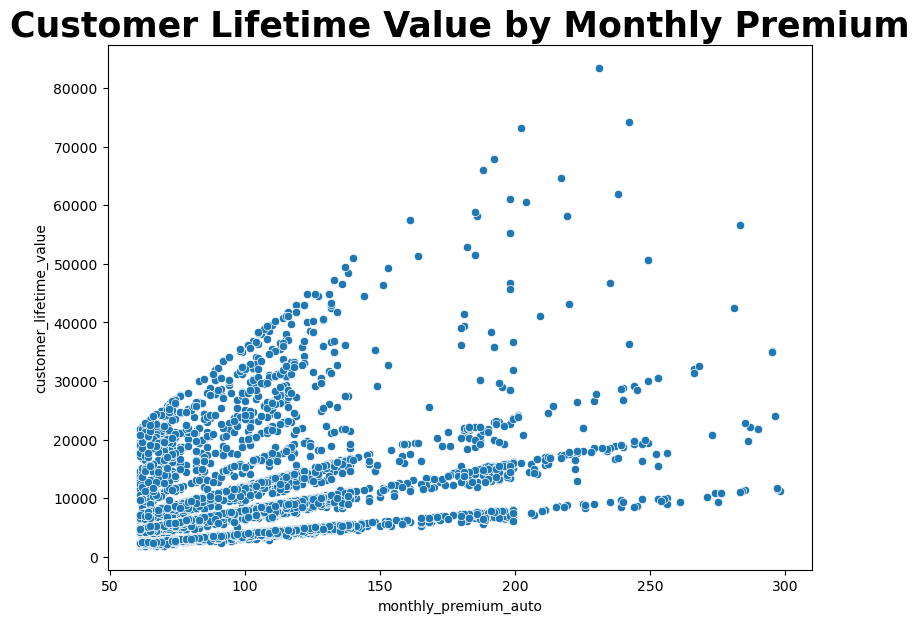

In [9]:
# exploring relation between Monthly Premium and Customer Lifetime Value
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Customer Lifetime Value by Monthly Premium', size='25', fontweight='bold')

sns.scatterplot(data=num_df, x='monthly_premium_auto', y='customer_lifetime_value')